In [ ]:
!pip install opencv-python-headless
!pip install numpy

In [ ]:
import cv2
import numpy as np

# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Load names of classes
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Get the names of the output layers
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Generate random colors for each class
colors = np.random.uniform(0, 255, size=(len(classes), 3))


In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving 59.png to 59.png
User uploaded file "59.png" with length 149053 bytes


In [ ]:
import cv2
import numpy as np

image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
height, width, channels = image.shape

blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = confidences[i]
        color = colors[class_ids[i]]
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, label + " " + str(round(confidence, 2)), (x, y + 30), cv2.FONT_HERSHEY_PLAIN, 3, color, 3)


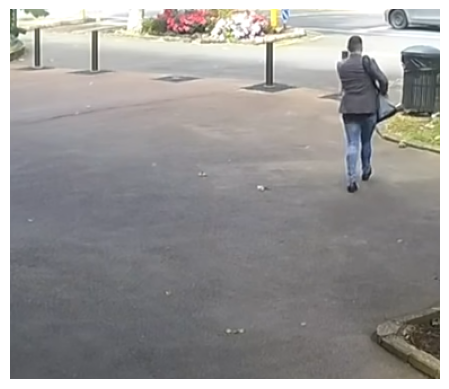

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Upload an image file
uploaded = files.upload()

Saving 67.png to 67.png


In [ ]:
# Get the uploaded image file name
image_file = next(iter(uploaded))
# Open Computer Vision
# Load the image
image = cv2.imread(image_file)

array([[[111, 111, 113],
        [130, 129, 132],
        [156, 155, 158],
        ...,
        [ 44,  51,  51],
        [ 53,  59,  59],
        [ 73,  78,  78]],

       [[ 98,  98, 100],
        [ 98,  97, 100],
        [104, 103, 105],
        ...,
        [ 54,  59,  61],
        [ 59,  64,  65],
        [ 72,  76,  77]],

       [[105, 105, 107],
        [107, 107, 109],
        [104, 103, 105],
        ...,
        [ 49,  54,  56],
        [ 57,  62,  63],
        [ 72,  76,  77]],

       ...,

       [[ 88, 134, 123],
        [ 87, 132, 121],
        [ 74, 118, 107],
        ...,
        [118, 119, 114],
        [118, 119, 113],
        [116, 117, 111]],

       [[100, 145, 134],
        [ 83, 128, 117],
        [ 80, 124, 113],
        ...,
        [118, 119, 115],
        [117, 119, 114],
        [114, 115, 110]],

       [[ 96, 139, 128],
        [103, 147, 136],
        [135, 178, 168],
        ...,
        [119, 120, 116],
        [117, 118, 114],
        [117, 118, 113]]], dtype=uint8)
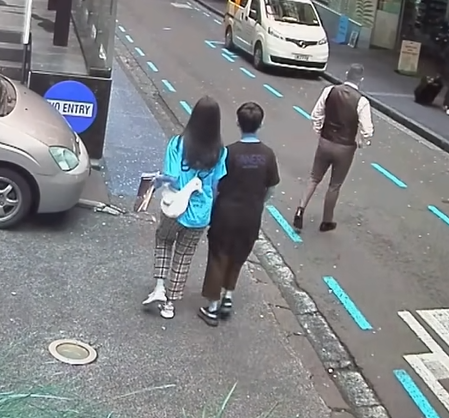

In [ ]:
image

Number of detected humans: 0


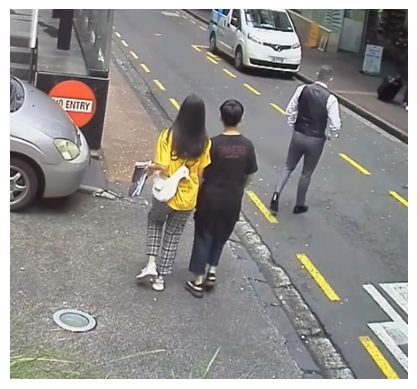

In [ ]:
body_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_fullbody.xml')

# Convert the image to grayscale (Haar Cascade requires grayscale images)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect humans in the image
bodies = body_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around detected humans and count them
num_bodies = 0
for (x, y, w, h) in bodies:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    num_bodies += 1

# Display the number of detected humans
print(f'Number of detected humans: {num_bodies}')

# Display the output image with detections
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

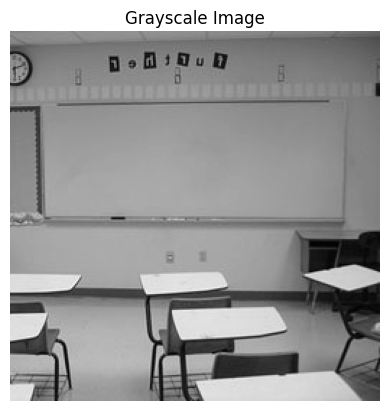

In [ ]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.show()

In [1]:
# Using the robust model for object detection
!pip install opencv-python-headless numpy

In [2]:
import urllib.request

# YOLOv3 configuration and weights files
yolo_cfg_url = "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"
yolo_weights_url = "https://pjreddie.com/media/files/yolov3.weights"
yolo_names_url = "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

# Download files
urllib.request.urlretrieve(yolo_cfg_url, "yolov3.cfg")
urllib.request.urlretrieve(yolo_weights_url, "yolov3.weights")
urllib.request.urlretrieve(yolo_names_url, "coco.names")

('coco.names', <http.client.HTTPMessage at 0x7fa1b40995a0>)

In [12]:
from google.colab import files
uploaded = files.upload()
image_file = next(iter(uploaded))

Saving 67.png to 67.png


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

In [15]:
# Load image
image = cv2.imread(image_file)
height, width, channels = image.shape

In [16]:
# Prepare the image for YOLO
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
output_layers = net.getUnconnectedOutLayersNames()
outs = net.forward(output_layers)

In [18]:
# Analyze the outputs
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply non-max suppression
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [19]:
# Draw bounding boxes
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = (255, 0, 0)
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, label, (x, y - 10), font, 1, color, 2)

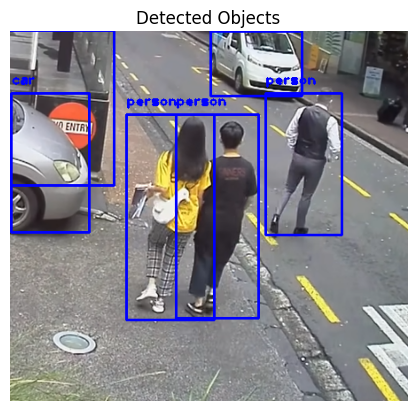

In [20]:
# Display the image with detections
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Detected Objects')
plt.show()

In [21]:
detected_count = len(indexes)
# Print the number of detected objects
print(f'Number of detected objects: {detected_count}')

Number of detected objects: 6
